# Pandas: exploring, loading and saving data
- selection and slicing: selecting columns and rows
- adding rows and columns
- understanding the data 
- selecting based on a criteria

In [3]:
# Import pandas library
import pandas as pd

## Two ways of creating the same DataFrame

### Creating a dictionary containing employee data and defining a DataFrame from it

In [4]:
data = {'Num':[1, 2, 3, 4, 5, 6],
        'Name':['Trevor', 'Princi', 'Peter', 'Gaurav', 'Anuj', "Peter"],
        'Age':[27, 24, 50, 22, 32, 25],
        'City':['London', 'Paris', "Lisbon", 'Paris', 'Paris', "Madrid"],
        'Degree':['MSc', 'MA', "PhD", 'MCA', 'Phd', "MSc"]}
data

{'Num': [1, 2, 3, 4, 5, 6],
 'Name': ['Trevor', 'Princi', 'Peter', 'Gaurav', 'Anuj', 'Peter'],
 'Age': [27, 24, 50, 22, 32, 25],
 'City': ['London', 'Paris', 'Lisbon', 'Paris', 'Paris', 'Madrid'],
 'Degree': ['MSc', 'MA', 'PhD', 'MCA', 'Phd', 'MSc']}

In [5]:
df = pd.DataFrame(data)
df

,Num,Name,Age,City,Degree
0,1,Trevor,27,London,MSc
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA
4,5,Anuj,32,Paris,Phd
5,6,Peter,25,Madrid,MSc


### Creating a DataFrame from a list of records

In [6]:
data = [
    [1, 'Trevor', 27, 'London', 'MSc'],
    [2, 'Princi', 24, 'Paris', 'MA'],
    [3, 'Peter', 50, 'Lisbon', 'PhD'],
    [4, 'Gaurav', 22, 'Paris', 'MCA'],
    [5, 'Anuj', 32, 'Paris', 'Phd'],
    [6, 'Peter', 25, 'Madrid', 'MSc']
]
df = pd.DataFrame(data, columns=["Num", "Name", "Age", "City", "Degree"])
df

,Num,Name,Age,City,Degree
0,1,Trevor,27,London,MSc
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA
4,5,Anuj,32,Paris,Phd
5,6,Peter,25,Madrid,MSc


Actually, we could create the same DataFrame using many other strategies

In [7]:
df = df.set_index("Num")
df

,Name,Age,City,Degree
Num,,,,
1,Trevor,27,London,MSc
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD
4,Gaurav,22,Paris,MCA
5,Anuj,32,Paris,Phd
6,Peter,25,Madrid,MSc


## Accessing elements

selecting columns ...

In [8]:
df["Name"]

Num
1    Trevor
2    Princi
3     Peter
4    Gaurav
5      Anuj
6     Peter
Name: Name, dtype: object

In [9]:
# selects two columns
print(df[['Name', 'Degree']])

       Name Degree
Num               
1    Trevor    MSc
2    Princi     MA
3     Peter    PhD
4    Gaurav    MCA
5      Anuj    Phd
6     Peter    MSc


### Indexers: iloc, loc
When selecting rows, slicing and indexing conventions can be a source of confusion...
- iloc: implicit integer index (positions in a vector)
- loc : explicit integer index (uses the actual index value)

In [10]:
df

,Name,Age,City,Degree
Num,,,,
1,Trevor,27,London,MSc
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD
4,Gaurav,22,Paris,MCA
5,Anuj,32,Paris,Phd
6,Peter,25,Madrid,MSc


In [11]:
df[1:3]

,Name,Age,City,Degree
Num,,,,
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD


In [12]:
# implicit index when slicing
df.iloc[1:3]

,Name,Age,City,Degree
Num,,,,
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD


In [13]:
# explicit index when slicing
df.loc[1:3]

,Name,Age,City,Degree
Num,,,,
1,Trevor,27,London,MSc
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD


In [14]:
# Remember df[xxx] will access column xxx 

In [15]:
# implicit integer index
df.iloc[1]

Name      Princi
Age           24
City       Paris
Degree        MA
Name: 2, dtype: object

In [16]:
# explicit index when indexing
df.loc[1]

Name      Trevor
Age           27
City      London
Degree       MSc
Name: 1, dtype: object

In [17]:
df.loc[4]["Age"]

22

In [18]:
df.loc[4, "Age"]

22

## Adding a new column

In [19]:
df["Country"] = ["IN","FR","PT","FR","FR","SP"]
df["Score"] = [18, 16, 19, 20, 16, 18]
df

,Name,Age,City,Degree,Country,Score
Num,,,,,,
1,Trevor,27,London,MSc,IN,18
2,Princi,24,Paris,MA,FR,16
3,Peter,50,Lisbon,PhD,PT,19
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
6,Peter,25,Madrid,MSc,SP,18


## Adding rows

In [20]:
df.loc["Mike"] = ["Mike", 33, "London", "MA", "UK", 15]
df

,Name,Age,City,Degree,Country,Score
Num,,,,,,
1,Trevor,27,London,MSc,IN,18
2,Princi,24,Paris,MA,FR,16
3,Peter,50,Lisbon,PhD,PT,19
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
6,Peter,25,Madrid,MSc,SP,18
Mike,Mike,33,London,MA,UK,15


## Check if a value exists

In [21]:
'Mike' in df.index

True

In [22]:
# How is this possible ?
'Mike' in df["City"]

True

In [23]:
'Mike' in df["City"].values

False

## Changing Rows

In [25]:
df.loc["Mike", "Age"] += 1
df

,Name,Age,City,Degree,Country,Score
Num,,,,,,
1,Trevor,27,London,MSc,IN,18
2,Princi,24,Paris,MA,FR,16
3,Peter,50,Lisbon,PhD,PT,19
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
6,Peter,25,Madrid,MSc,SP,18
Mike,Mike,35,London,MA,UK,15


In [26]:
df.loc[1] = ["Pierre", 21, "Avignon", "MA", "BR", 14]
df

,Name,Age,City,Degree,Country,Score
Num,,,,,,
1,Pierre,21,Avignon,MA,BR,14
2,Princi,24,Paris,MA,FR,16
3,Peter,50,Lisbon,PhD,PT,19
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
6,Peter,25,Madrid,MSc,SP,18
Mike,Mike,35,London,MA,UK,15


In [ ]:
# Note that the following won't work as expected: We are extracting a series and changing only that series
df.iloc[1]["Age"] += 1
df

## Understanding your data

In [27]:
df.describe()

,Age,Score
count,7.000000,7.000000
mean,29.857143,16.857143
std,10.286376,2.193063
min,21.000000,14.000000
25%,23.000000,15.500000
50%,25.000000,16.000000
75%,33.500000,18.500000
max,50.000000,20.000000


In [28]:
df[["City","Country"]].value_counts()

City     Country
Paris    FR         3
Madrid   SP         1
London   UK         1
Lisbon   PT         1
Avignon  BR         1
dtype: int64

In [29]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

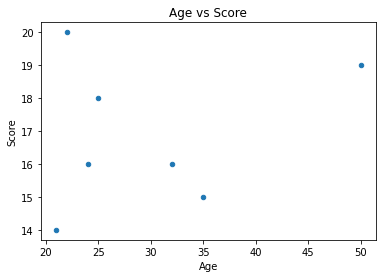

In [30]:
df.plot(kind='scatter', x='Age', y='Score', title='Age vs Score');

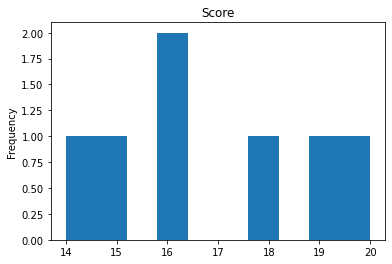

In [31]:
df['Score'].plot(kind='hist', title='Score');
#df['Score'].plot(kind='line', title='Score');
#df['Score'].plot(kind='bar', title='Score');

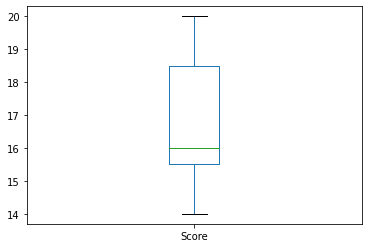

In [32]:
df['Score'].plot(kind="box");

## Selecting data based on criteria

In [33]:
df["City"] == "Paris"

Num
1       False
2        True
3       False
4        True
5        True
6       False
Mike    False
Name: City, dtype: bool

In [34]:
df[df["City"] == "Paris"]

,Name,Age,City,Degree,Country,Score
Num,,,,,,
2,Princi,24,Paris,MA,FR,16
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16


In [35]:
df[ df["City"] == "Paris" ]["Age"].mean()

26.0

In [36]:
(df["City"] == "Paris") | (df["City"] == "London") 

Num
1       False
2        True
3       False
4        True
5        True
6       False
Mike     True
Name: City, dtype: bool

In [37]:
df[ (df["City"] == "Paris") | (df["City"] == "London") ]

,Name,Age,City,Degree,Country,Score
Num,,,,,,
2,Princi,24,Paris,MA,FR,16
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
Mike,Mike,35,London,MA,UK,15


In [38]:
df[ df["City"].isin(["Paris", "London"]) ]

,Name,Age,City,Degree,Country,Score
Num,,,,,,
2,Princi,24,Paris,MA,FR,16
4,Gaurav,22,Paris,MCA,FR,20
5,Anuj,32,Paris,Phd,FR,16
Mike,Mike,35,London,MA,UK,15


In [39]:
df[ (df["City"].isin(["Paris", "London"])) & ( df["Age"] > 25 ) ]

,Name,Age,City,Degree,Country,Score
Num,,,,,,
5,Anuj,32,Paris,Phd,FR,16
Mike,Mike,35,London,MA,UK,15


# Reading data from a file and writing data to a file

### Writing to CSV, JSON, SQL, and Excel files

It’s quite simple to save and load data from various file formats into a DataFrame.

In [40]:
df.to_csv('data/people.csv')

In [41]:
df.to_json('data/people.json')

If you’re working with data from a SQL database you need to first establish a connection using an appropriate Python library, then pass a query to pandas. Here we'll use SQLite to demonstrate. 

In [ ]:
import sqlite3
con = sqlite3.connect("data/people.sqlite3")
df.to_sql('people', con)

In [ ]:
# the openpyxl library is required 
# pip3 install openpyxl
df.to_excel('data/people.xlsx')

### Reading from CSV files

In [ ]:
df2 = pd.read_csv('data/people.csv')
df2

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [ ]:
df2 = pd.read_csv('data/people.csv', index_col=0)
df2

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

### Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [ ]:
df2 = pd.read_json('data/people.json')
df2

### Reading data from a SQL database

In [ ]:
import sqlite3
con = sqlite3.connect("data/people.sqlite3")
df2 = pd.read_sql_query("SELECT * FROM people", con) # index_col='index'
df2

Just like with CSVs, we could pass index_col='index', but we can also set an index after-the-fact:

In [ ]:
df2 = df2.set_index('index')
df2

### Reading data from Excel

In [ ]:
df2 = pd.read_excel('data/people.xlsx', index_col=0)
df2